In [88]:
import h5py
import numpy as np
import torch
from torch import nn
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale, MinMaxScaler,StandardScaler
from collections import Counter
import matplotlib.colors as mcolors
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from IPython.core.debugger import set_trace
import torch 
import pandas as pd
from torch.utils.data import DataLoader,Dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
################
from sklearn.feature_selection import chi2,SelectKBest,VarianceThreshold,f_classif
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import *

In [2]:
dir = './SG24_dataset.h5'
file = h5py.File(dir,'r')
features=np.array(file['Predictors']).T
users=np.array(file['User']).T.squeeze()
target=np.array(file['Target']).T.squeeze()

In [6]:
#Normalisation et PCA
Xp = scale(features)
pca = PCA(n_components=2).fit(Xp)
Xp = pca.transform(Xp)

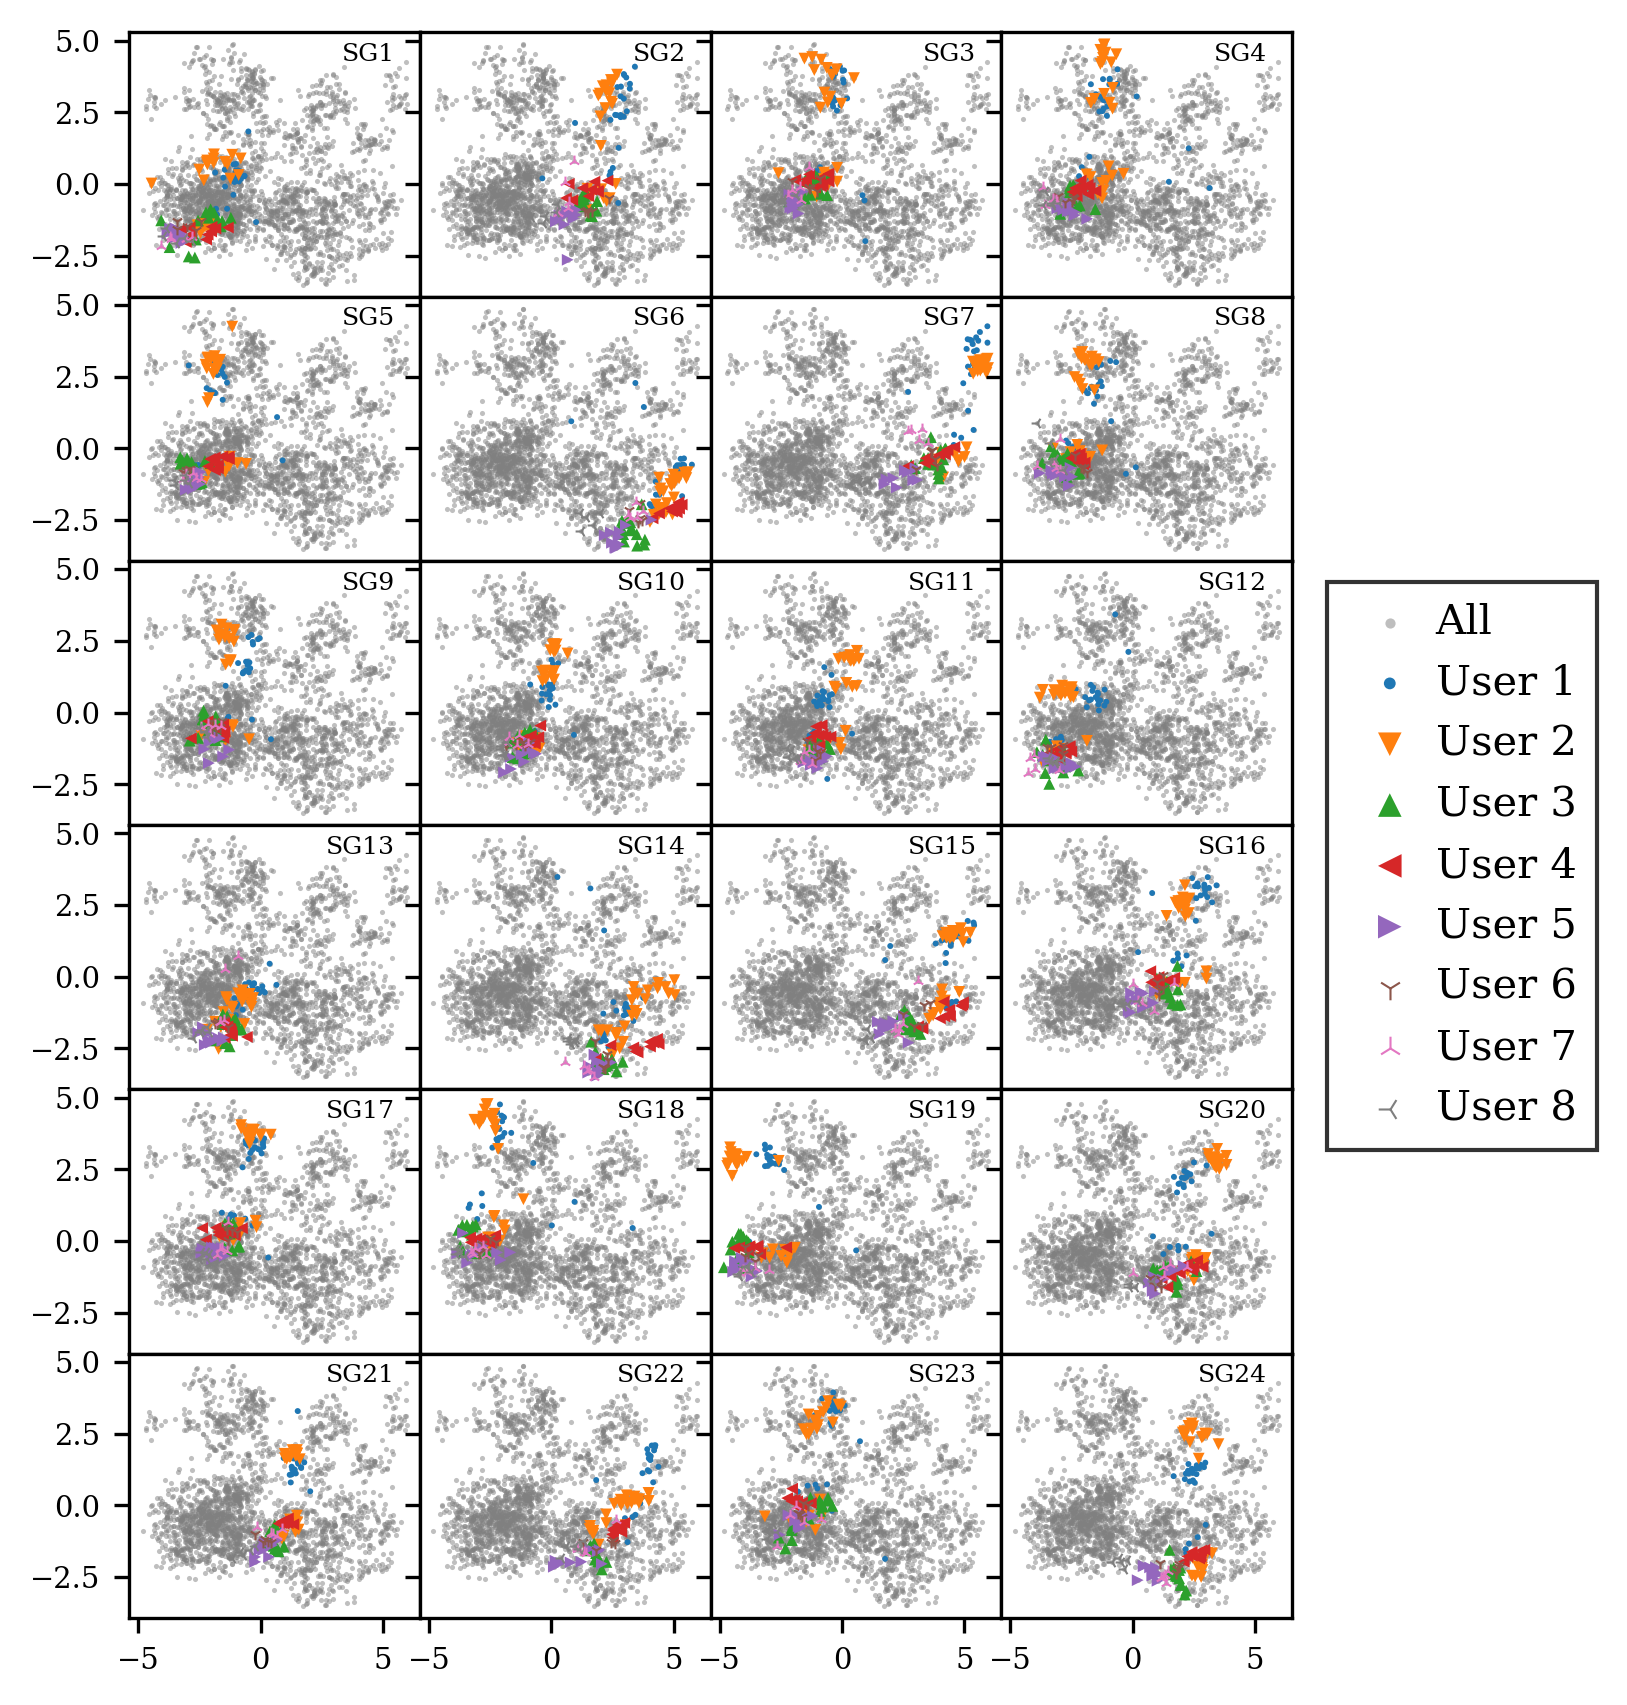

In [9]:
marker_list = ('.','v','^','<','>','1','2','3')
plt.rc('font', family='serif')
plt.rc('legend', edgecolor=(0,0,0),fancybox=False)
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rc('lines', markeredgewidth=0.5,linewidth=0.5)
f,axarr = plt.subplots(6,4, sharex=True, sharey=True, figsize=(5,7),dpi=300)
f.subplots_adjust(hspace=0.0,wspace=0)
for i in np.unique(target):
    indarr = np.unravel_index(i-1,(6,4))
    t = target==i
    
    # Scatter 1: not class
    axarr[indarr].scatter(Xp[:,0],Xp[:,1],
         s=6,
         facecolor='gray',
         alpha=0.5,
         linewidth=0,
         marker='.',
         label='All',
         zorder=0)
    # Title
    axarr[indarr].text(5.5,4.3,'SG%i' % i, ha='right', fontsize=6)
    axarr[indarr].set_rasterization_zorder(1)
    
    for indmarker,j in enumerate(np.unique(users)):
        ji = np.logical_and(t,users==j)
        
        # Scatter 2: class
        axarr[indarr].scatter(Xp[ji,0], Xp[ji,1],
             s=8,
             edgecolor='none',
             marker=marker_list[indmarker],
             linewidth=0.5,
             label=('User %i' % j))
lgd = axarr[indarr].legend(loc=2,
                    markerscale=2,
                    borderpad=0.5,
                    handletextpad=0.1,
                    bbox_to_anchor=(1.05,4.0))

In [15]:
#Normalisation et PCA
Xp = scale(features)
tsne = TSNE(n_components=2,learning_rate='auto',init='pca').fit(features)
Xp = tsne.fit_transform(features)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


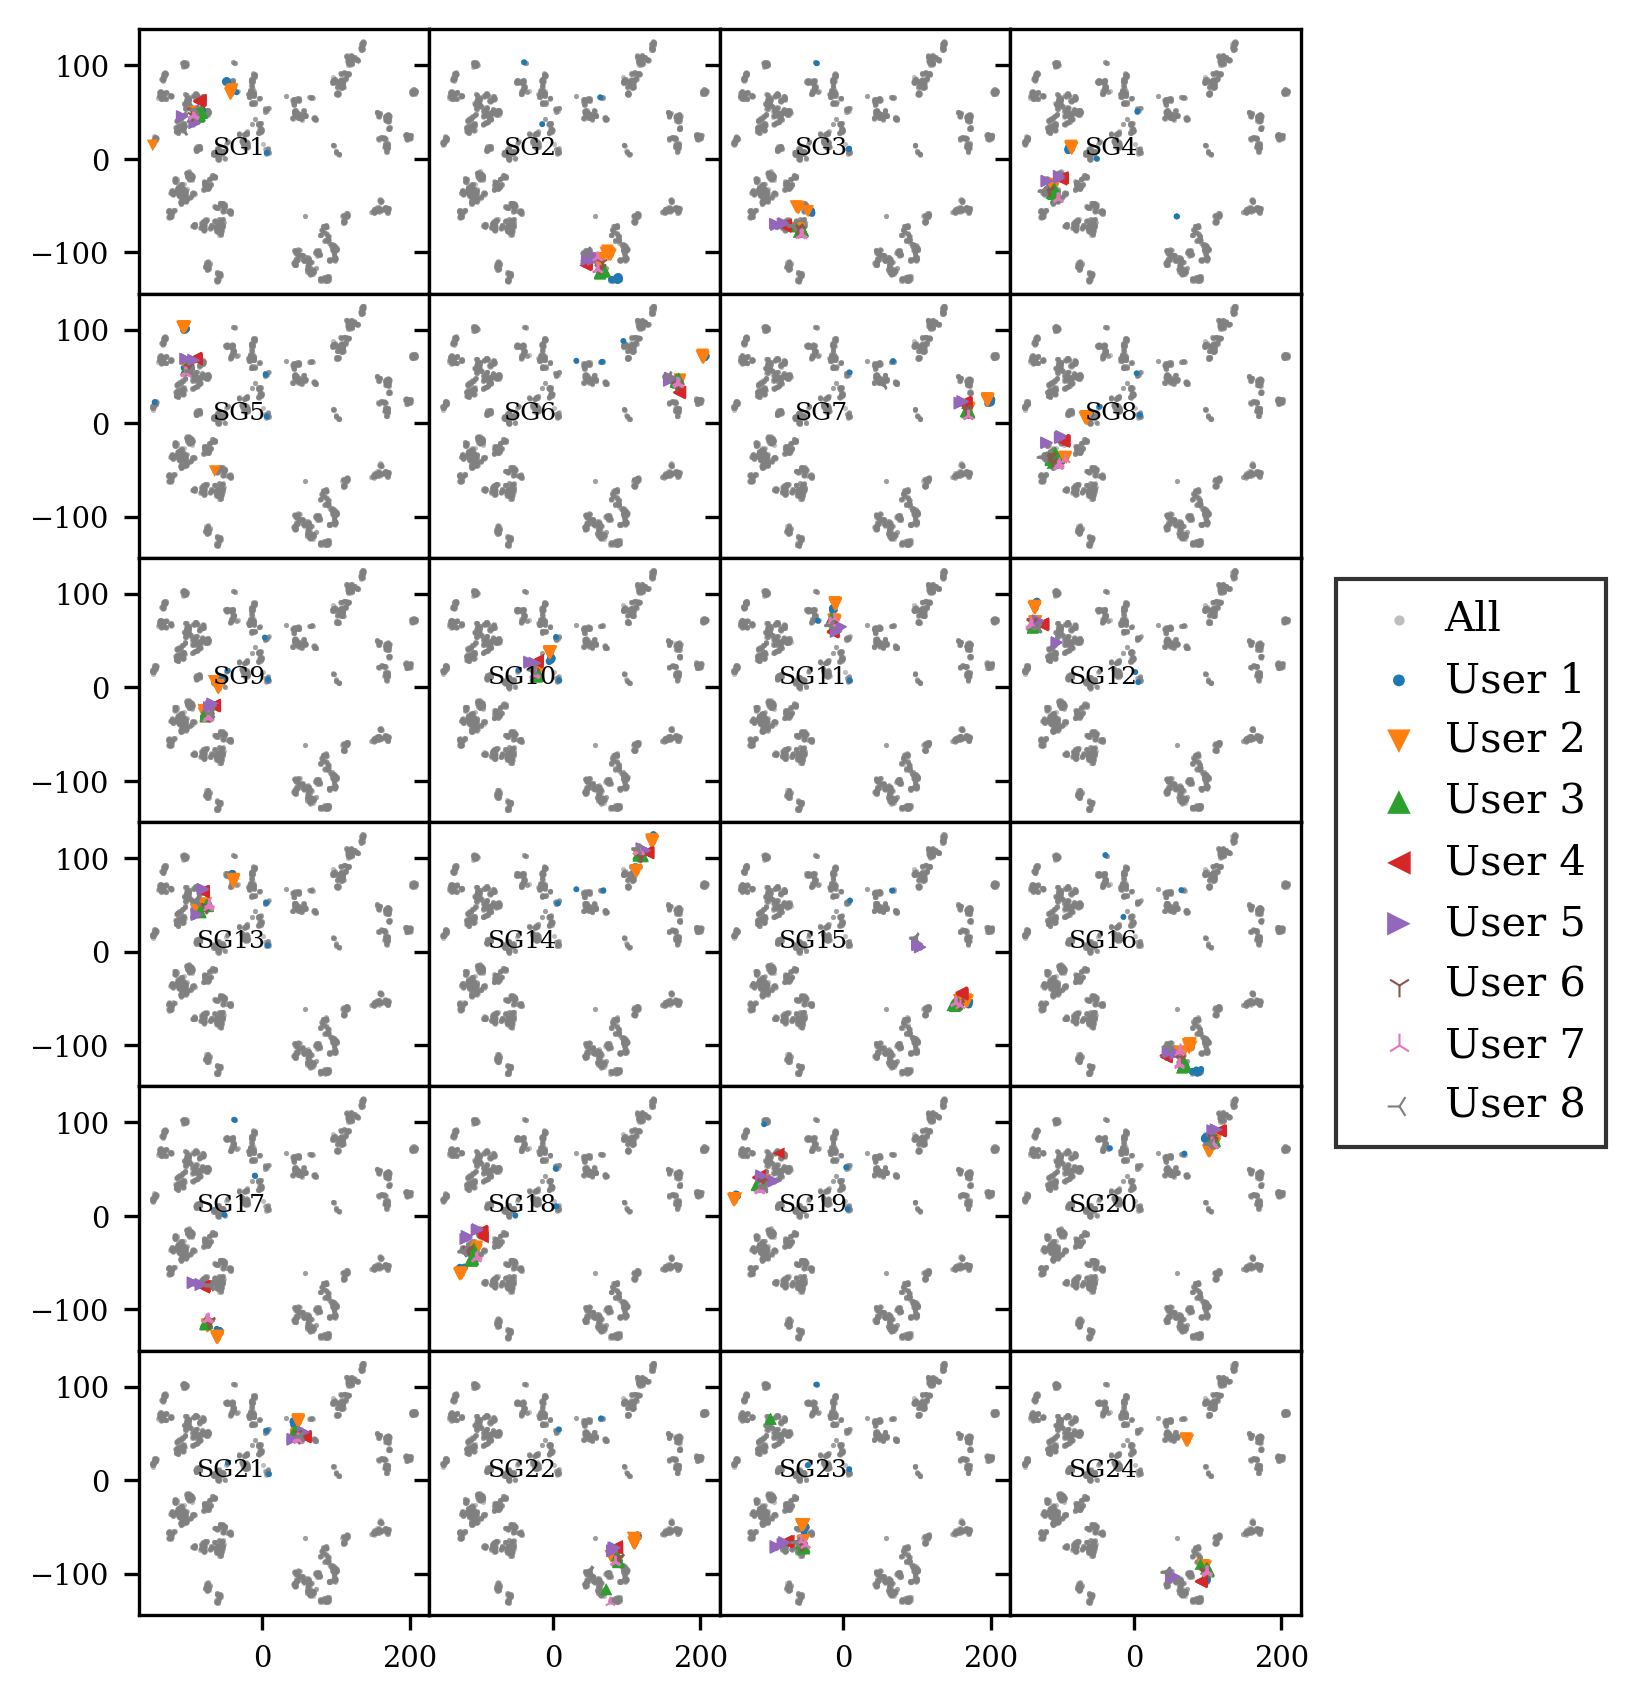

In [16]:
marker_list = ('.','v','^','<','>','1','2','3')
plt.rc('font', family='serif')
plt.rc('legend', edgecolor=(0,0,0),fancybox=False)
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rc('lines', markeredgewidth=0.5,linewidth=0.5)
f,axarr = plt.subplots(6,4, sharex=True, sharey=True, figsize=(5,7),dpi=300)
f.subplots_adjust(hspace=0.0,wspace=0)
for i in np.unique(target):
    indarr = np.unravel_index(i-1,(6,4))
    t = target==i
    
    # Scatter 1: not class
    axarr[indarr].scatter(Xp[:,0],Xp[:,1],
         s=6,
         facecolor='gray',
         alpha=0.5,
         linewidth=0,
         marker='.',
         label='All',
         zorder=0)
    # Title
    axarr[indarr].text(5.5,4.3,'SG%i' % i, ha='right', fontsize=6)
    axarr[indarr].set_rasterization_zorder(1)
    
    for indmarker,j in enumerate(np.unique(users)):
        ji = np.logical_and(t,users==j)
        
        # Scatter 2: class
        axarr[indarr].scatter(Xp[ji,0], Xp[ji,1],
             s=8,
             edgecolor='none',
             marker=marker_list[indmarker],
             linewidth=0.5,
             label=('User %i' % j))
lgd = axarr[indarr].legend(loc=2,
                    markerscale=2,
                    borderpad=0.5,
                    handletextpad=0.1,
                    bbox_to_anchor=(1.05,4.0))

In [4]:
Counter(users)

Counter({1: 600, 2: 600, 3: 360, 4: 240, 5: 240, 6: 120, 7: 120, 8: 120})

In [23]:
np.unique(users)

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int8)

############

In [89]:
pd.DataFrame(features).describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,53.669293,-5.698329,0.203902,0.491011,-0.140472,0.164828,-0.149610,129.851667,137.503750,145.390833,...,110.054167,82.854167,103.005417,91.606667,143.834167,109.237083,120.668750,82.562500,137.099167,83.047500
std,41.520634,32.720964,22.393903,0.249192,0.281654,0.690302,0.268272,32.298842,15.895186,31.776834,...,46.031646,20.323427,45.260604,22.685341,53.253552,17.291823,29.802893,48.056139,21.926745,30.394479
min,0.000000,-81.559349,-68.739662,0.000000,-0.855817,-1.000000,-0.789427,1.000000,44.000000,36.000000,...,0.000000,1.000000,1.000000,25.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,-26.450032,-15.801244,0.314152,-0.387735,-0.846747,-0.360048,122.000000,128.000000,121.750000,...,63.000000,71.000000,79.000000,75.000000,92.000000,105.000000,104.000000,49.000000,131.000000,64.000000
50%,70.621365,0.000000,0.000000,0.555695,0.000000,0.471377,-0.062433,128.000000,135.000000,152.000000,...,132.000000,81.000000,114.000000,92.000000,159.000000,106.000000,126.000000,86.000000,141.000000,78.000000
75%,84.528341,0.000000,17.166466,0.691598,0.000000,0.629917,0.000000,134.000000,143.000000,170.000000,...,151.000000,93.000000,134.000000,111.000000,192.000000,107.000000,142.000000,116.000000,149.000000,101.000000
max,127.721718,78.185921,59.903419,0.955188,0.727471,1.000000,0.782390,238.000000,206.000000,207.000000,...,179.000000,170.000000,218.000000,229.000000,248.000000,255.000000,189.000000,216.000000,192.000000,193.000000


# Normalisation

In [80]:
dir = './SG24_dataset.h5'
file = h5py.File(dir,'r')
features=np.array(file['Predictors']).T
users=np.array(file['User']).T.squeeze()
target=np.array(file['Target']).T.squeeze()

np.random.seed(12)
Xtrain,Xtest,y_train,y_test=train_test_split(features,target,test_size=0.2)
scaler = StandardScaler().fit(Xtrain)
X_train = scaler.transform(Xtrain)
X_test= scaler.transform(Xtest)

In [73]:
clf=DummyClassifier(strategy='uniform')
print("train",clf.fit(Xtrain,Ytrain).score(Xtrain,Ytrain))
print("test",clf.fit(Xtrain,Ytrain).score(Xtest,Yteset))

train 0.043229166666666666
test 0.06458333333333334


# Var1

In [84]:
#Model une variable train
var1=X_train.T[:1].T
var2=X_train.T[1:2].T
var3=X_train.T[2:3].T
var4=X_train.T[3:4].T
var5=X_train.T[4:5].T
var6=X_train.T[5:6].T
var7=X_train.T[6:7].T
var8=X_train.T[7:8].T
var9=X_train.T[8:9].T
var10=X_train.T[9:10].T
var11=X_train.T[10:11].T
var12=X_train.T[11:12].T
var13=X_train.T[12:13].T
var14=X_train.T[13:14].T
var15=X_train.T[14:15].T
var16=X_train.T[15:16].T
var17=X_train.T[16:17].T
var18=X_train.T[17:18].T
var19=X_train.T[18:19].T
var20=X_train.T[19:20].T
var21=X_train.T[20:21].T
var22=X_train.T[21:22].T
var23=X_train.T[22:23].T
var24=X_train.T[23:24].T
var25=X_train.T[24:25].T
var26=X_train.T[25:26].T
var27=X_train.T[26:27].T
var28=X_train.T[27:28].T
var29=X_train.T[28:29].T


#test
var1t=X_test.T[:1].T
var2t=X_test.T[1:2].T
var3t=X_test.T[2:3].T
var4t=X_test.T[3:4].T
var5t=X_test.T[4:5].T
var6t=X_test.T[5:6].T
var7t=X_test.T[6:7].T
var8t=X_test.T[7:8].T
var9t=X_test.T[8:9].T
var10t=X_test.T[9:10].T
var11t=X_test.T[10:11].T
var12t=X_test.T[11:12].T
var13t=X_test.T[12:13].T
var14t=X_test.T[13:14].T
var15t=X_test.T[14:15].T
var16t=X_test.T[15:16].T
var17t=X_test.T[16:17].T
var18t=X_test.T[17:18].T
var19t=X_test.T[18:19].T
var20t=X_test.T[19:20].T
var21t=X_test.T[20:21].T
var22t=X_test.T[21:22].T
var23t=X_test.T[22:23].T
var24t=X_test.T[23:24].T
var25t=X_test.T[24:25].T
var26t=X_test.T[25:26].T
var27t=X_test.T[26:27].T
var28t=X_test.T[27:28].T
var29t=X_test.T[28:29].T

Text(0, 0.5, 'Accuracy')

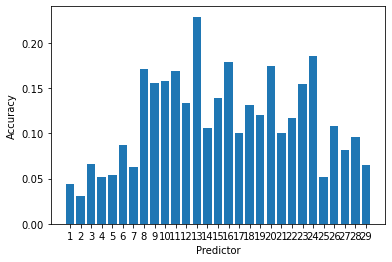

In [82]:
res=[]
for i in range(1,30):
    res.append(DecisionTreeClassifier().fit(eval('var'+str(i)),y_train).score(eval('var'+str(i)+'t'),y_test))
plt.bar([i for i in range(1,30)],res)
plt.xticks([i for i in range(1,30)])
plt.xlabel('Predictor')
plt.ylabel('Accuracy')

In [86]:
DecisionTreeClassifier().fit(var13,y_train).score(var13,y_train)

0.33229166666666665

# Stump

[Text(0.5, 0.75, 'X[12] <= 0.26\ngini = 0.958\nsamples = 1920\nvalue = [81, 83, 86, 82, 76, 79, 78, 77, 83, 83, 78, 74\n82, 79, 87, 83, 78, 74, 78, 80, 85, 79, 83, 72]'),
 Text(0.25, 0.25, 'gini = 0.941\nsamples = 1333\nvalue = [81, 81, 85, 82, 76, 0, 0, 75, 82, 79, 2, 74\n81, 2, 0, 81, 78, 74, 78, 0, 2, 76, 83, 61]'),
 Text(0.75, 0.25, 'gini = 0.869\nsamples = 587\nvalue = [0, 2, 1, 0, 0, 79, 78, 2, 1, 4, 76, 0, 1, 77\n87, 2, 0, 0, 0, 80, 83, 3, 0, 11]')]

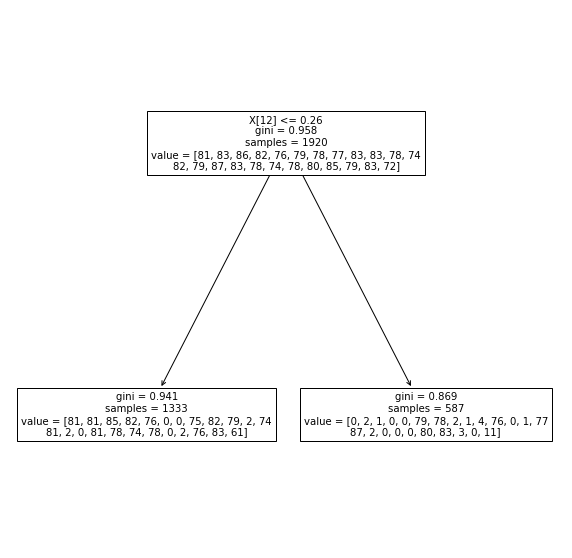

In [95]:
clf1=DecisionTreeClassifier(max_depth=1).fit(X_train,y_train) #.score(X_test,y_test)

plt.figure(figsize=(10,10))
plot_tree(clf1)

([<matplotlib.axis.XTick at 0x7fbc58077ca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

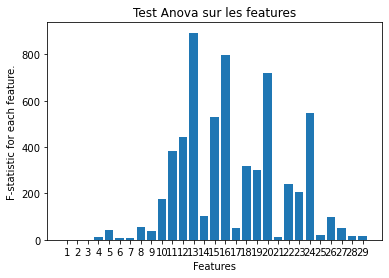

In [51]:
plt.bar(np.arange(features.shape[1])+1,f_classif(features,target)[0])
plt.title('Test Anova sur les features')
plt.xlabel('Features')
plt.ylabel('F-statistic for each feature.')
plt.xticks(np.arange(features.shape[1])+1)

In [33]:
SelectKBest(chi2,k=24).fit(X,target).get_feature_names_out()

array(['x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12',
       'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x25', 'x26', 'x28'], dtype=object)

### Réseau de Neurone

In [34]:
class SGDataSet(Dataset):
    def __init__(self,data,labels):
        self.data=data
        self.labels=labels
    
    def __getitem__(self,idx):
        return self.data[idx],self.labels[idx]
    
    def __len__(self):
        return len(self.data)

In [74]:
dir = './SG24_dataset.h5'
file = h5py.File(dir,'r')
features=torch.tensor(np.array(file['Predictors']).T,dtype=torch.float32)
users=torch.tensor(np.array(file['User']).T.squeeze())
target=torch.tensor(np.array(file['Target']).T.squeeze()).long()-1

In [75]:
train_ratio=0.7
length=int(len(features)*train_ratio)
train_set=SGDataSet(features[:length],target[:length])
test_set=SGDataSet(features[length:],target[length:])

train_loader=DataLoader(train_set,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_set,batch_size=batch_size,shuffle=False)

In [79]:
batch_size=32
lr=0.001
nb_epoch=100
model=nn.Sequential(nn.Linear(29,256),
                    nn.Tanh(),
                    nn.Linear(256,128),
                    nn.Tanh(),
                    nn.Linear(128,64),
                    nn.Tanh(),
                    nn.Linear(64,24))
optim=torch.optim.Adam(model.parameters(),lr=lr)
loss_fn=torch.nn.CrossEntropyLoss()

In [80]:
for i in range (nb_epoch):
    for x,y in train_loader:
        output=model(x)
        loss=loss_fn(output,y)
        acc=(output.argmax(dim=-1)==y).float().mean()
        print(f'loss en train a l\'epoche {i} et de {loss} et d\'une accuracy de {acc}')
        optim.zero_grad()
        loss.backward()
        optim.step()
    
    for x,y in test_loader:
        output=model(x)
        loss=loss_fn(output,y)
        acc=(output.argmax(dim=-1)==y).float().mean()
        print(f'loss en test a l\'epoche {i} et de {loss} et d\'une accuracy de {acc}')
        

loss en train a l'epoche 0 et de 3.1720664501190186 et d'une accuracy de 0.03125
loss en train a l'epoche 0 et de 3.1784939765930176 et d'une accuracy de 0.0625
loss en train a l'epoche 0 et de 3.206991195678711 et d'une accuracy de 0.03125
loss en train a l'epoche 0 et de 3.2004642486572266 et d'une accuracy de 0.03125
loss en train a l'epoche 0 et de 3.08052134513855 et d'une accuracy de 0.0625
loss en train a l'epoche 0 et de 3.099330425262451 et d'une accuracy de 0.1875
loss en train a l'epoche 0 et de 3.137058973312378 et d'une accuracy de 0.03125
loss en train a l'epoche 0 et de 3.0539350509643555 et d'une accuracy de 0.125
loss en train a l'epoche 0 et de 3.1255698204040527 et d'une accuracy de 0.0625
loss en train a l'epoche 0 et de 3.09497332572937 et d'une accuracy de 0.21875
loss en train a l'epoche 0 et de 3.035811185836792 et d'une accuracy de 0.15625
loss en train a l'epoche 0 et de 3.025848150253296 et d'une accuracy de 0.125
loss en train a l'epoche 0 et de 3.0069847106

loss en test a l'epoche 1 et de 1.0283130407333374 et d'une accuracy de 0.75
loss en test a l'epoche 1 et de 0.8824980854988098 et d'une accuracy de 0.875
loss en test a l'epoche 1 et de 0.9150604009628296 et d'une accuracy de 0.84375
loss en test a l'epoche 1 et de 0.9713801145553589 et d'une accuracy de 0.8125
loss en test a l'epoche 1 et de 1.2190830707550049 et d'une accuracy de 0.71875
loss en test a l'epoche 1 et de 1.1693373918533325 et d'une accuracy de 0.65625
loss en test a l'epoche 1 et de 1.0662791728973389 et d'une accuracy de 0.71875
loss en test a l'epoche 1 et de 1.3452309370040894 et d'une accuracy de 0.65625
loss en test a l'epoche 1 et de 1.3036783933639526 et d'une accuracy de 0.65625
loss en test a l'epoche 1 et de 1.3045051097869873 et d'une accuracy de 0.71875
loss en test a l'epoche 1 et de 1.2672944068908691 et d'une accuracy de 0.75
loss en test a l'epoche 1 et de 0.922172486782074 et d'une accuracy de 0.875
loss en test a l'epoche 1 et de 0.8897002339363098 e

loss en train a l'epoche 4 et de 0.5445749163627625 et d'une accuracy de 0.8125
loss en train a l'epoche 4 et de 0.23067010939121246 et d'une accuracy de 0.9375
loss en train a l'epoche 4 et de 0.3224025368690491 et d'une accuracy de 0.96875
loss en train a l'epoche 4 et de 0.5466352105140686 et d'une accuracy de 0.8125
loss en train a l'epoche 4 et de 0.587863028049469 et d'une accuracy de 0.9375
loss en train a l'epoche 4 et de 0.7150376439094543 et d'une accuracy de 0.84375
loss en train a l'epoche 4 et de 0.5266020894050598 et d'une accuracy de 0.84375
loss en train a l'epoche 4 et de 0.34315794706344604 et d'une accuracy de 0.9375
loss en train a l'epoche 4 et de 0.3229164481163025 et d'une accuracy de 0.96875
loss en train a l'epoche 4 et de 0.39154472947120667 et d'une accuracy de 0.96875
loss en train a l'epoche 4 et de 0.22262011468410492 et d'une accuracy de 0.96875
loss en train a l'epoche 4 et de 0.5321698188781738 et d'une accuracy de 0.875
loss en train a l'epoche 4 et de

loss en train a l'epoche 6 et de 0.20223958790302277 et d'une accuracy de 1.0
loss en train a l'epoche 6 et de 0.325713574886322 et d'une accuracy de 0.96875
loss en train a l'epoche 6 et de 0.2447018325328827 et d'une accuracy de 0.96875
loss en train a l'epoche 6 et de 0.23811182379722595 et d'une accuracy de 0.90625
loss en train a l'epoche 6 et de 0.398313045501709 et d'une accuracy de 0.875
loss en train a l'epoche 6 et de 0.27792903780937195 et d'une accuracy de 0.96875
loss en train a l'epoche 6 et de 0.4511425495147705 et d'une accuracy de 0.84375
loss en train a l'epoche 6 et de 0.4741155207157135 et d'une accuracy de 0.875
loss en train a l'epoche 6 et de 0.3583756387233734 et d'une accuracy de 0.90625
loss en train a l'epoche 6 et de 0.2982494533061981 et d'une accuracy de 0.9375
loss en train a l'epoche 6 et de 0.33809611201286316 et d'une accuracy de 0.90625
loss en train a l'epoche 6 et de 0.3717974126338959 et d'une accuracy de 0.90625
loss en train a l'epoche 6 et de 0.

loss en train a l'epoche 8 et de 0.18530094623565674 et d'une accuracy de 0.96875
loss en train a l'epoche 8 et de 0.3310258388519287 et d'une accuracy de 0.90625
loss en train a l'epoche 8 et de 0.4531647861003876 et d'une accuracy de 0.875
loss en train a l'epoche 8 et de 0.24889634549617767 et d'une accuracy de 0.96875
loss en train a l'epoche 8 et de 0.38211432099342346 et d'une accuracy de 0.90625
loss en train a l'epoche 8 et de 0.38951602578163147 et d'une accuracy de 0.84375
loss en train a l'epoche 8 et de 0.3757632076740265 et d'une accuracy de 0.90625
loss en train a l'epoche 8 et de 0.3191123306751251 et d'une accuracy de 0.90625
loss en train a l'epoche 8 et de 0.19823896884918213 et d'une accuracy de 0.90625
loss en train a l'epoche 8 et de 0.5338507890701294 et d'une accuracy de 0.875
loss en train a l'epoche 8 et de 0.2866402864456177 et d'une accuracy de 0.84375
loss en train a l'epoche 8 et de 0.3970409631729126 et d'une accuracy de 0.875
loss en train a l'epoche 8 et

loss en train a l'epoche 10 et de 0.43905842304229736 et d'une accuracy de 0.875
loss en train a l'epoche 10 et de 0.2430269420146942 et d'une accuracy de 0.9375
loss en train a l'epoche 10 et de 0.32723039388656616 et d'une accuracy de 0.875
loss en train a l'epoche 10 et de 0.23452329635620117 et d'une accuracy de 0.90625
loss en train a l'epoche 10 et de 0.16774605214595795 et d'une accuracy de 0.9375
loss en train a l'epoche 10 et de 0.1541297435760498 et d'une accuracy de 0.96875
loss en train a l'epoche 10 et de 0.13327224552631378 et d'une accuracy de 0.96875
loss en train a l'epoche 10 et de 0.11933103948831558 et d'une accuracy de 0.96875
loss en train a l'epoche 10 et de 0.349566787481308 et d'une accuracy de 0.90625
loss en train a l'epoche 10 et de 0.2161836326122284 et d'une accuracy de 0.9375
loss en train a l'epoche 10 et de 0.3959883749485016 et d'une accuracy de 0.90625
loss en train a l'epoche 10 et de 0.2638550400733948 et d'une accuracy de 0.875
loss en train a l'ep

loss en train a l'epoche 12 et de 0.15574270486831665 et d'une accuracy de 0.9375
loss en train a l'epoche 12 et de 0.38468384742736816 et d'une accuracy de 0.90625
loss en train a l'epoche 12 et de 0.14923180639743805 et d'une accuracy de 0.96875
loss en train a l'epoche 12 et de 0.2857336103916168 et d'une accuracy de 0.90625
loss en train a l'epoche 12 et de 0.2544891834259033 et d'une accuracy de 0.875
loss en test a l'epoche 12 et de 0.5407199859619141 et d'une accuracy de 0.8125
loss en test a l'epoche 12 et de 0.4297023415565491 et d'une accuracy de 0.71875
loss en test a l'epoche 12 et de 0.35691145062446594 et d'une accuracy de 0.875
loss en test a l'epoche 12 et de 0.3673521876335144 et d'une accuracy de 0.84375
loss en test a l'epoche 12 et de 0.6056931614875793 et d'une accuracy de 0.8125
loss en test a l'epoche 12 et de 0.7045941948890686 et d'une accuracy de 0.78125
loss en test a l'epoche 12 et de 0.5806815028190613 et d'une accuracy de 0.78125
loss en test a l'epoche 12

loss en test a l'epoche 14 et de 1.225581407546997 et d'une accuracy de 0.53125
loss en test a l'epoche 14 et de 0.782146692276001 et d'une accuracy de 0.71875
loss en test a l'epoche 14 et de 0.7513975501060486 et d'une accuracy de 0.6875
loss en test a l'epoche 14 et de 0.7970638275146484 et d'une accuracy de 0.8125
loss en train a l'epoche 15 et de 0.28723543882369995 et d'une accuracy de 0.8125
loss en train a l'epoche 15 et de 0.18679729104042053 et d'une accuracy de 0.9375
loss en train a l'epoche 15 et de 0.10961048305034637 et d'une accuracy de 1.0
loss en train a l'epoche 15 et de 0.22134476900100708 et d'une accuracy de 0.90625
loss en train a l'epoche 15 et de 0.3933943808078766 et d'une accuracy de 0.8125
loss en train a l'epoche 15 et de 0.15705041587352753 et d'une accuracy de 0.96875
loss en train a l'epoche 15 et de 0.21429364383220673 et d'une accuracy de 0.9375
loss en train a l'epoche 15 et de 0.4538215100765228 et d'une accuracy de 0.875
loss en train a l'epoche 15 

loss en train a l'epoche 17 et de 0.14632125198841095 et d'une accuracy de 0.90625
loss en train a l'epoche 17 et de 0.22862890362739563 et d'une accuracy de 0.9375
loss en train a l'epoche 17 et de 0.18935464322566986 et d'une accuracy de 0.9375
loss en train a l'epoche 17 et de 0.18302243947982788 et d'une accuracy de 0.90625
loss en train a l'epoche 17 et de 0.21700768172740936 et d'une accuracy de 0.90625
loss en train a l'epoche 17 et de 0.28112831711769104 et d'une accuracy de 0.90625
loss en train a l'epoche 17 et de 0.13986073434352875 et d'une accuracy de 0.96875
loss en train a l'epoche 17 et de 0.08701750636100769 et d'une accuracy de 0.96875
loss en train a l'epoche 17 et de 0.24098286032676697 et d'une accuracy de 0.9375
loss en train a l'epoche 17 et de 0.2530631124973297 et d'une accuracy de 0.96875
loss en train a l'epoche 17 et de 0.3865143954753876 et d'une accuracy de 0.875
loss en train a l'epoche 17 et de 0.21514320373535156 et d'une accuracy de 0.90625
loss en tra

loss en train a l'epoche 19 et de 0.21160167455673218 et d'une accuracy de 0.875
loss en train a l'epoche 19 et de 0.20318344235420227 et d'une accuracy de 0.96875
loss en train a l'epoche 19 et de 0.3222849369049072 et d'une accuracy de 0.90625
loss en train a l'epoche 19 et de 0.19455325603485107 et d'une accuracy de 0.96875
loss en train a l'epoche 19 et de 0.252451092004776 et d'une accuracy de 0.90625
loss en train a l'epoche 19 et de 0.1675626039505005 et d'une accuracy de 0.9375
loss en train a l'epoche 19 et de 0.2129766345024109 et d'une accuracy de 0.9375
loss en train a l'epoche 19 et de 0.2110026627779007 et d'une accuracy de 0.9375
loss en train a l'epoche 19 et de 0.15682677924633026 et d'une accuracy de 0.96875
loss en train a l'epoche 19 et de 0.16916891932487488 et d'une accuracy de 0.9375
loss en train a l'epoche 19 et de 0.10626732558012009 et d'une accuracy de 0.96875
loss en train a l'epoche 19 et de 0.32669079303741455 et d'une accuracy de 0.875
loss en train a l'

loss en train a l'epoche 21 et de 0.15304523706436157 et d'une accuracy de 0.9375
loss en train a l'epoche 21 et de 0.13044798374176025 et d'une accuracy de 0.96875
loss en train a l'epoche 21 et de 0.08365976810455322 et d'une accuracy de 0.96875
loss en train a l'epoche 21 et de 0.23413269221782684 et d'une accuracy de 0.9375
loss en train a l'epoche 21 et de 0.23736529052257538 et d'une accuracy de 0.90625
loss en train a l'epoche 21 et de 0.2863006293773651 et d'une accuracy de 0.84375
loss en train a l'epoche 21 et de 0.3599802851676941 et d'une accuracy de 0.8125
loss en train a l'epoche 21 et de 0.14844706654548645 et d'une accuracy de 0.90625
loss en train a l'epoche 21 et de 0.2951282560825348 et d'une accuracy de 0.90625
loss en train a l'epoche 21 et de 0.30592256784439087 et d'une accuracy de 0.84375
loss en train a l'epoche 21 et de 0.23406453430652618 et d'une accuracy de 0.9375
loss en train a l'epoche 21 et de 0.2134740948677063 et d'une accuracy de 0.96875
loss en trai

loss en test a l'epoche 23 et de 0.33510199189186096 et d'une accuracy de 0.875
loss en test a l'epoche 23 et de 0.289527952671051 et d'une accuracy de 0.90625
loss en test a l'epoche 23 et de 0.3118017017841339 et d'une accuracy de 0.875
loss en test a l'epoche 23 et de 0.6053904891014099 et d'une accuracy de 0.75
loss en test a l'epoche 23 et de 0.709422767162323 et d'une accuracy de 0.75
loss en test a l'epoche 23 et de 0.4578922390937805 et d'une accuracy de 0.78125
loss en test a l'epoche 23 et de 0.8104467391967773 et d'une accuracy de 0.78125
loss en test a l'epoche 23 et de 0.982378363609314 et d'une accuracy de 0.625
loss en test a l'epoche 23 et de 0.9529064893722534 et d'une accuracy de 0.65625
loss en test a l'epoche 23 et de 0.7338548302650452 et d'une accuracy de 0.75
loss en test a l'epoche 23 et de 0.5806006789207458 et d'une accuracy de 0.84375
loss en test a l'epoche 23 et de 0.27312999963760376 et d'une accuracy de 0.8125
loss en test a l'epoche 23 et de 0.3679450750

loss en train a l'epoche 26 et de 0.12001632153987885 et d'une accuracy de 0.9375
loss en train a l'epoche 26 et de 0.3665305972099304 et d'une accuracy de 0.84375
loss en train a l'epoche 26 et de 0.1952376514673233 et d'une accuracy de 0.875
loss en train a l'epoche 26 et de 0.24067635834217072 et d'une accuracy de 0.875
loss en train a l'epoche 26 et de 0.31661245226860046 et d'une accuracy de 0.875
loss en train a l'epoche 26 et de 0.1726517230272293 et d'une accuracy de 0.9375
loss en train a l'epoche 26 et de 0.16312631964683533 et d'une accuracy de 0.96875
loss en train a l'epoche 26 et de 0.21486209332942963 et d'une accuracy de 0.90625
loss en train a l'epoche 26 et de 0.443877249956131 et d'une accuracy de 0.84375
loss en train a l'epoche 26 et de 0.1854230910539627 et d'une accuracy de 0.9375
loss en train a l'epoche 26 et de 0.23201432824134827 et d'une accuracy de 0.9375
loss en train a l'epoche 26 et de 0.6232133507728577 et d'une accuracy de 0.78125
loss en train a l'epo

loss en train a l'epoche 28 et de 0.38057905435562134 et d'une accuracy de 0.875
loss en train a l'epoche 28 et de 0.31520119309425354 et d'une accuracy de 0.84375
loss en train a l'epoche 28 et de 0.4005085229873657 et d'une accuracy de 0.8125
loss en train a l'epoche 28 et de 0.11344799399375916 et d'une accuracy de 0.96875
loss en train a l'epoche 28 et de 0.2370101362466812 et d'une accuracy de 0.875
loss en train a l'epoche 28 et de 0.23233932256698608 et d'une accuracy de 0.90625
loss en train a l'epoche 28 et de 0.3455173671245575 et d'une accuracy de 0.875
loss en train a l'epoche 28 et de 0.23598067462444305 et d'une accuracy de 0.90625
loss en train a l'epoche 28 et de 0.6381206512451172 et d'une accuracy de 0.75
loss en train a l'epoche 28 et de 0.20037169754505157 et d'une accuracy de 0.96875
loss en train a l'epoche 28 et de 0.30440419912338257 et d'une accuracy de 0.875
loss en train a l'epoche 28 et de 0.2573358416557312 et d'une accuracy de 0.90625
loss en train a l'epo

loss en train a l'epoche 30 et de 0.276215523481369 et d'une accuracy de 0.875
loss en train a l'epoche 30 et de 0.12877492606639862 et d'une accuracy de 0.9375
loss en train a l'epoche 30 et de 0.25452741980552673 et d'une accuracy de 0.875
loss en train a l'epoche 30 et de 0.3557721674442291 et d'une accuracy de 0.8125
loss en train a l'epoche 30 et de 0.1850055605173111 et d'une accuracy de 0.9375
loss en train a l'epoche 30 et de 0.1550423949956894 et d'une accuracy de 0.9375
loss en train a l'epoche 30 et de 0.253583163022995 et d'une accuracy de 0.96875
loss en train a l'epoche 30 et de 0.09303314983844757 et d'une accuracy de 0.96875
loss en train a l'epoche 30 et de 0.36910808086395264 et d'une accuracy de 0.84375
loss en train a l'epoche 30 et de 0.30625373125076294 et d'une accuracy de 0.875
loss en train a l'epoche 30 et de 0.22436542809009552 et d'une accuracy de 0.9375
loss en train a l'epoche 30 et de 0.34146812558174133 et d'une accuracy de 0.9375
loss en train a l'epoch

loss en train a l'epoche 32 et de 0.13143309950828552 et d'une accuracy de 0.9375
loss en train a l'epoche 32 et de 0.4319732189178467 et d'une accuracy de 0.8125
loss en train a l'epoche 32 et de 0.2817986309528351 et d'une accuracy de 0.84375
loss en train a l'epoche 32 et de 0.13855265080928802 et d'une accuracy de 0.96875
loss en train a l'epoche 32 et de 0.22162851691246033 et d'une accuracy de 0.90625
loss en train a l'epoche 32 et de 0.2634010314941406 et d'une accuracy de 0.9375
loss en test a l'epoche 32 et de 0.4006083905696869 et d'une accuracy de 0.8125
loss en test a l'epoche 32 et de 0.2919626235961914 et d'une accuracy de 0.875
loss en test a l'epoche 32 et de 0.27442893385887146 et d'une accuracy de 0.875
loss en test a l'epoche 32 et de 0.39003705978393555 et d'une accuracy de 0.84375
loss en test a l'epoche 32 et de 0.5066347718238831 et d'une accuracy de 0.84375
loss en test a l'epoche 32 et de 0.6453983187675476 et d'une accuracy de 0.71875
loss en test a l'epoche 3

loss en test a l'epoche 34 et de 1.2087761163711548 et d'une accuracy de 0.6875
loss en train a l'epoche 35 et de 0.28255027532577515 et d'une accuracy de 0.875
loss en train a l'epoche 35 et de 0.0977131575345993 et d'une accuracy de 0.96875
loss en train a l'epoche 35 et de 0.3198329210281372 et d'une accuracy de 0.875
loss en train a l'epoche 35 et de 0.25809791684150696 et d'une accuracy de 0.9375
loss en train a l'epoche 35 et de 0.35695070028305054 et d'une accuracy de 0.875
loss en train a l'epoche 35 et de 0.25121673941612244 et d'une accuracy de 0.90625
loss en train a l'epoche 35 et de 0.3843947649002075 et d'une accuracy de 0.875
loss en train a l'epoche 35 et de 0.2737260162830353 et d'une accuracy de 0.875
loss en train a l'epoche 35 et de 0.13574938476085663 et d'une accuracy de 0.875
loss en train a l'epoche 35 et de 0.35250791907310486 et d'une accuracy de 0.875
loss en train a l'epoche 35 et de 0.15967752039432526 et d'une accuracy de 0.9375
loss en train a l'epoche 35

loss en train a l'epoche 37 et de 0.13547350466251373 et d'une accuracy de 1.0
loss en train a l'epoche 37 et de 0.1977718472480774 et d'une accuracy de 0.9375
loss en train a l'epoche 37 et de 0.24935254454612732 et d'une accuracy de 0.9375
loss en train a l'epoche 37 et de 0.3375121057033539 et d'une accuracy de 0.90625
loss en train a l'epoche 37 et de 0.3147042989730835 et d'une accuracy de 0.84375
loss en train a l'epoche 37 et de 0.3195905089378357 et d'une accuracy de 0.84375
loss en train a l'epoche 37 et de 0.21840715408325195 et d'une accuracy de 0.9375
loss en train a l'epoche 37 et de 0.13337889313697815 et d'une accuracy de 0.96875
loss en train a l'epoche 37 et de 0.09793257713317871 et d'une accuracy de 1.0
loss en train a l'epoche 37 et de 0.06869502365589142 et d'une accuracy de 0.9375
loss en train a l'epoche 37 et de 0.14245422184467316 et d'une accuracy de 0.9375
loss en train a l'epoche 37 et de 0.1448497325181961 et d'une accuracy de 0.9375
loss en train a l'epoch

loss en train a l'epoche 39 et de 0.3253648579120636 et d'une accuracy de 0.875
loss en train a l'epoche 39 et de 0.34175732731819153 et d'une accuracy de 0.875
loss en train a l'epoche 39 et de 0.13055385649204254 et d'une accuracy de 0.9375
loss en train a l'epoche 39 et de 0.2043316513299942 et d'une accuracy de 0.96875
loss en train a l'epoche 39 et de 0.2147485315799713 et d'une accuracy de 0.875
loss en train a l'epoche 39 et de 0.245027557015419 et d'une accuracy de 0.875
loss en train a l'epoche 39 et de 0.19292503595352173 et d'une accuracy de 0.90625
loss en train a l'epoche 39 et de 0.05608585104346275 et d'une accuracy de 1.0
loss en train a l'epoche 39 et de 0.08148778975009918 et d'une accuracy de 1.0
loss en train a l'epoche 39 et de 0.040764980018138885 et d'une accuracy de 1.0
loss en train a l'epoche 39 et de 0.34112271666526794 et d'une accuracy de 0.90625
loss en train a l'epoche 39 et de 0.14305055141448975 et d'une accuracy de 0.96875
loss en train a l'epoche 39 e

loss en train a l'epoche 41 et de 0.18088527023792267 et d'une accuracy de 0.96875
loss en train a l'epoche 41 et de 0.3637886643409729 et d'une accuracy de 0.875
loss en train a l'epoche 41 et de 0.41127684712409973 et d'une accuracy de 0.84375
loss en train a l'epoche 41 et de 0.1456945687532425 et d'une accuracy de 0.9375
loss en train a l'epoche 41 et de 0.25294235348701477 et d'une accuracy de 0.90625
loss en train a l'epoche 41 et de 0.18241344392299652 et d'une accuracy de 0.9375
loss en train a l'epoche 41 et de 0.19255240261554718 et d'une accuracy de 0.90625
loss en train a l'epoche 41 et de 0.2320134937763214 et d'une accuracy de 0.90625
loss en train a l'epoche 41 et de 0.19875338673591614 et d'une accuracy de 0.90625
loss en train a l'epoche 41 et de 0.4096563160419464 et d'une accuracy de 0.875
loss en train a l'epoche 41 et de 0.16347838938236237 et d'une accuracy de 0.9375
loss en test a l'epoche 41 et de 0.6495511531829834 et d'une accuracy de 0.71875
loss en test a l'

loss en test a l'epoche 43 et de 1.0528448820114136 et d'une accuracy de 0.65625
loss en test a l'epoche 43 et de 0.42075303196907043 et d'une accuracy de 0.875
loss en test a l'epoche 43 et de 0.3834604322910309 et d'une accuracy de 0.875
loss en test a l'epoche 43 et de 0.40066248178482056 et d'une accuracy de 0.78125
loss en test a l'epoche 43 et de 0.20699207484722137 et d'une accuracy de 0.96875
loss en test a l'epoche 43 et de 0.5025655627250671 et d'une accuracy de 0.78125
loss en test a l'epoche 43 et de 0.33979493379592896 et d'une accuracy de 0.875
loss en test a l'epoche 43 et de 0.7425976395606995 et d'une accuracy de 0.75
loss en test a l'epoche 43 et de 0.5135605335235596 et d'une accuracy de 0.75
loss en test a l'epoche 43 et de 1.586696743965149 et d'une accuracy de 0.5625
loss en test a l'epoche 43 et de 1.066753625869751 et d'une accuracy de 0.6875
loss en test a l'epoche 43 et de 0.8377097845077515 et d'une accuracy de 0.78125
loss en test a l'epoche 43 et de 1.08573

loss en train a l'epoche 46 et de 0.41517573595046997 et d'une accuracy de 0.875
loss en train a l'epoche 46 et de 0.25021013617515564 et d'une accuracy de 0.90625
loss en train a l'epoche 46 et de 0.47509825229644775 et d'une accuracy de 0.875
loss en train a l'epoche 46 et de 0.1789085865020752 et d'une accuracy de 0.9375
loss en train a l'epoche 46 et de 0.19471484422683716 et d'une accuracy de 0.96875
loss en train a l'epoche 46 et de 0.27321523427963257 et d'une accuracy de 0.90625
loss en train a l'epoche 46 et de 0.20191912353038788 et d'une accuracy de 0.9375
loss en train a l'epoche 46 et de 0.15774306654930115 et d'une accuracy de 0.96875
loss en train a l'epoche 46 et de 0.4547361731529236 et d'une accuracy de 0.78125
loss en train a l'epoche 46 et de 0.15412256121635437 et d'une accuracy de 0.9375
loss en train a l'epoche 46 et de 0.2952474355697632 et d'une accuracy de 0.84375
loss en train a l'epoche 46 et de 0.4733218252658844 et d'une accuracy de 0.84375
loss en train a

loss en train a l'epoche 48 et de 0.026956183835864067 et d'une accuracy de 1.0
loss en train a l'epoche 48 et de 0.19070762395858765 et d'une accuracy de 0.9375
loss en train a l'epoche 48 et de 0.2375601977109909 et d'une accuracy de 0.9375
loss en train a l'epoche 48 et de 0.2159355878829956 et d'une accuracy de 0.875
loss en train a l'epoche 48 et de 0.29340142011642456 et d'une accuracy de 0.875
loss en train a l'epoche 48 et de 0.08391747623682022 et d'une accuracy de 1.0
loss en train a l'epoche 48 et de 0.19080813229084015 et d'une accuracy de 0.90625
loss en train a l'epoche 48 et de 0.14737007021903992 et d'une accuracy de 0.96875
loss en train a l'epoche 48 et de 0.2299605906009674 et d'une accuracy de 0.90625
loss en train a l'epoche 48 et de 0.14623713493347168 et d'une accuracy de 0.9375
loss en train a l'epoche 48 et de 0.20338976383209229 et d'une accuracy de 0.9375
loss en train a l'epoche 48 et de 0.11216003447771072 et d'une accuracy de 1.0
loss en train a l'epoche 4

loss en train a l'epoche 50 et de 0.3899182081222534 et d'une accuracy de 0.75
loss en train a l'epoche 50 et de 0.14767202734947205 et d'une accuracy de 0.9375
loss en train a l'epoche 50 et de 0.07223756611347198 et d'une accuracy de 0.96875
loss en train a l'epoche 50 et de 0.10504487156867981 et d'une accuracy de 0.96875
loss en train a l'epoche 50 et de 0.23710453510284424 et d'une accuracy de 0.9375
loss en train a l'epoche 50 et de 0.2706693410873413 et d'une accuracy de 0.90625
loss en train a l'epoche 50 et de 0.1647816002368927 et d'une accuracy de 0.96875
loss en train a l'epoche 50 et de 0.23284853994846344 et d'une accuracy de 0.96875
loss en train a l'epoche 50 et de 0.052253156900405884 et d'une accuracy de 1.0
loss en train a l'epoche 50 et de 0.28664490580558777 et d'une accuracy de 0.90625
loss en train a l'epoche 50 et de 0.5230545401573181 et d'une accuracy de 0.8125
loss en train a l'epoche 50 et de 0.284323513507843 et d'une accuracy de 0.90625
loss en train a l'e

loss en train a l'epoche 52 et de 0.05592416599392891 et d'une accuracy de 1.0
loss en test a l'epoche 52 et de 0.33481723070144653 et d'une accuracy de 0.875
loss en test a l'epoche 52 et de 0.26281461119651794 et d'une accuracy de 0.90625
loss en test a l'epoche 52 et de 0.24668526649475098 et d'une accuracy de 0.90625
loss en test a l'epoche 52 et de 0.42803704738616943 et d'une accuracy de 0.84375
loss en test a l'epoche 52 et de 0.5583553910255432 et d'une accuracy de 0.78125
loss en test a l'epoche 52 et de 0.8150377869606018 et d'une accuracy de 0.6875
loss en test a l'epoche 52 et de 1.08370041847229 et d'une accuracy de 0.75
loss en test a l'epoche 52 et de 1.1204944849014282 et d'une accuracy de 0.53125
loss en test a l'epoche 52 et de 1.1137696504592896 et d'une accuracy de 0.59375
loss en test a l'epoche 52 et de 1.1939061880111694 et d'une accuracy de 0.5625
loss en test a l'epoche 52 et de 0.8867997527122498 et d'une accuracy de 0.625
loss en test a l'epoche 52 et de 0.58

loss en train a l'epoche 55 et de 0.16356518864631653 et d'une accuracy de 0.9375
loss en train a l'epoche 55 et de 0.10884254425764084 et d'une accuracy de 0.96875
loss en train a l'epoche 55 et de 0.025419991463422775 et d'une accuracy de 1.0
loss en train a l'epoche 55 et de 0.11954609304666519 et d'une accuracy de 1.0
loss en train a l'epoche 55 et de 0.1700408160686493 et d'une accuracy de 0.90625
loss en train a l'epoche 55 et de 0.16363218426704407 et d'une accuracy de 0.9375
loss en train a l'epoche 55 et de 0.21931125223636627 et d'une accuracy de 0.84375
loss en train a l'epoche 55 et de 0.23170554637908936 et d'une accuracy de 0.96875
loss en train a l'epoche 55 et de 0.046758271753787994 et d'une accuracy de 1.0
loss en train a l'epoche 55 et de 0.2601121664047241 et d'une accuracy de 0.875
loss en train a l'epoche 55 et de 0.12102742493152618 et d'une accuracy de 0.9375
loss en train a l'epoche 55 et de 0.079903244972229 et d'une accuracy de 0.96875
loss en train a l'epoch

loss en train a l'epoche 57 et de 0.3876192569732666 et d'une accuracy de 0.875
loss en train a l'epoche 57 et de 0.10575234889984131 et d'une accuracy de 0.96875
loss en train a l'epoche 57 et de 0.31264689564704895 et d'une accuracy de 0.96875
loss en train a l'epoche 57 et de 0.17195096611976624 et d'une accuracy de 0.9375
loss en train a l'epoche 57 et de 0.1863728016614914 et d'une accuracy de 0.90625
loss en train a l'epoche 57 et de 0.17890113592147827 et d'une accuracy de 0.90625
loss en train a l'epoche 57 et de 0.42399290204048157 et d'une accuracy de 0.875
loss en train a l'epoche 57 et de 0.12887725234031677 et d'une accuracy de 0.96875
loss en train a l'epoche 57 et de 0.17757242918014526 et d'une accuracy de 0.90625
loss en train a l'epoche 57 et de 0.18993611633777618 et d'une accuracy de 0.90625
loss en train a l'epoche 57 et de 0.24340787529945374 et d'une accuracy de 0.875
loss en train a l'epoche 57 et de 0.28936564922332764 et d'une accuracy de 0.875
loss en train a

loss en train a l'epoche 59 et de 0.45226943492889404 et d'une accuracy de 0.84375
loss en train a l'epoche 59 et de 0.128469318151474 et d'une accuracy de 0.9375
loss en train a l'epoche 59 et de 0.10127214342355728 et d'une accuracy de 0.96875
loss en train a l'epoche 59 et de 0.11476314812898636 et d'une accuracy de 0.9375
loss en train a l'epoche 59 et de 0.06663798540830612 et d'une accuracy de 0.96875
loss en train a l'epoche 59 et de 0.15679490566253662 et d'une accuracy de 0.9375
loss en train a l'epoche 59 et de 0.2855139970779419 et d'une accuracy de 0.9375
loss en train a l'epoche 59 et de 0.1680741161108017 et d'une accuracy de 0.9375
loss en train a l'epoche 59 et de 0.09849514067173004 et d'une accuracy de 0.9375
loss en train a l'epoche 59 et de 0.1413312554359436 et d'une accuracy de 0.96875
loss en train a l'epoche 59 et de 0.14702454209327698 et d'une accuracy de 0.9375
loss en train a l'epoche 59 et de 0.06742281466722488 et d'une accuracy de 0.96875
loss en train a 

loss en train a l'epoche 61 et de 0.1242239773273468 et d'une accuracy de 0.96875
loss en train a l'epoche 61 et de 0.0534835085272789 et d'une accuracy de 0.96875
loss en train a l'epoche 61 et de 0.23185133934020996 et d'une accuracy de 0.875
loss en train a l'epoche 61 et de 0.14040696620941162 et d'une accuracy de 0.9375
loss en train a l'epoche 61 et de 0.06567837297916412 et d'une accuracy de 0.96875
loss en train a l'epoche 61 et de 0.26260992884635925 et d'une accuracy de 0.9375
loss en test a l'epoche 61 et de 0.3769274055957794 et d'une accuracy de 0.875
loss en test a l'epoche 61 et de 0.3227405548095703 et d'une accuracy de 0.8125
loss en test a l'epoche 61 et de 0.3031861186027527 et d'une accuracy de 0.9375
loss en test a l'epoche 61 et de 0.45473983883857727 et d'une accuracy de 0.8125
loss en test a l'epoche 61 et de 0.4115023910999298 et d'une accuracy de 0.84375
loss en test a l'epoche 61 et de 0.8362681269645691 et d'une accuracy de 0.75
loss en test a l'epoche 61 et

loss en test a l'epoche 63 et de 0.9161585569381714 et d'une accuracy de 0.6875
loss en test a l'epoche 63 et de 1.1325044631958008 et d'une accuracy de 0.625
loss en test a l'epoche 63 et de 0.9313952326774597 et d'une accuracy de 0.6875
loss en test a l'epoche 63 et de 0.8606531023979187 et d'une accuracy de 0.6875
loss en test a l'epoche 63 et de 0.6528826355934143 et d'une accuracy de 0.875
loss en train a l'epoche 64 et de 0.09197060018777847 et d'une accuracy de 1.0
loss en train a l'epoche 64 et de 0.22353263199329376 et d'une accuracy de 0.90625
loss en train a l'epoche 64 et de 0.14334353804588318 et d'une accuracy de 0.9375
loss en train a l'epoche 64 et de 0.3057124614715576 et d'une accuracy de 0.90625
loss en train a l'epoche 64 et de 0.16383448243141174 et d'une accuracy de 0.9375
loss en train a l'epoche 64 et de 0.1777455359697342 et d'une accuracy de 0.9375
loss en train a l'epoche 64 et de 0.30749350786209106 et d'une accuracy de 0.90625
loss en train a l'epoche 64 et

loss en train a l'epoche 66 et de 0.20478864014148712 et d'une accuracy de 0.9375
loss en train a l'epoche 66 et de 0.2720043361186981 et d'une accuracy de 0.9375
loss en train a l'epoche 66 et de 0.06595581024885178 et d'une accuracy de 0.96875
loss en train a l'epoche 66 et de 0.10528424382209778 et d'une accuracy de 1.0
loss en train a l'epoche 66 et de 0.14237137138843536 et d'une accuracy de 0.875
loss en train a l'epoche 66 et de 0.2855561375617981 et d'une accuracy de 0.90625
loss en train a l'epoche 66 et de 0.21491612493991852 et d'une accuracy de 0.84375
loss en train a l'epoche 66 et de 0.26438024640083313 et d'une accuracy de 0.90625
loss en train a l'epoche 66 et de 0.17679163813591003 et d'une accuracy de 0.9375
loss en train a l'epoche 66 et de 0.18528985977172852 et d'une accuracy de 0.875
loss en train a l'epoche 66 et de 0.2779195010662079 et d'une accuracy de 0.90625
loss en train a l'epoche 66 et de 0.3155764937400818 et d'une accuracy de 0.875
loss en train a l'epo

loss en train a l'epoche 68 et de 0.15068432688713074 et d'une accuracy de 0.96875
loss en train a l'epoche 68 et de 0.2131803333759308 et d'une accuracy de 0.9375
loss en train a l'epoche 68 et de 0.16017092764377594 et d'une accuracy de 0.9375
loss en train a l'epoche 68 et de 0.07531263679265976 et d'une accuracy de 0.96875
loss en train a l'epoche 68 et de 0.12451144307851791 et d'une accuracy de 0.96875
loss en train a l'epoche 68 et de 0.2441415935754776 et d'une accuracy de 0.9375
loss en train a l'epoche 68 et de 0.13450773060321808 et d'une accuracy de 0.9375
loss en train a l'epoche 68 et de 0.11824216693639755 et d'une accuracy de 0.90625
loss en train a l'epoche 68 et de 0.5155826807022095 et d'une accuracy de 0.8125
loss en train a l'epoche 68 et de 0.16400717198848724 et d'une accuracy de 0.9375
loss en train a l'epoche 68 et de 0.3305470049381256 et d'une accuracy de 0.875
loss en train a l'epoche 68 et de 0.34840232133865356 et d'une accuracy de 0.90625
loss en train a 

loss en train a l'epoche 70 et de 0.2498408854007721 et d'une accuracy de 0.875
loss en train a l'epoche 70 et de 0.17921176552772522 et d'une accuracy de 0.9375
loss en train a l'epoche 70 et de 0.1415044516324997 et d'une accuracy de 0.875
loss en train a l'epoche 70 et de 0.15726980566978455 et d'une accuracy de 0.9375
loss en train a l'epoche 70 et de 0.20584528148174286 et d'une accuracy de 0.875
loss en train a l'epoche 70 et de 0.1660541146993637 et d'une accuracy de 0.90625
loss en train a l'epoche 70 et de 0.12582220137119293 et d'une accuracy de 0.96875
loss en train a l'epoche 70 et de 0.21200528740882874 et d'une accuracy de 0.9375
loss en train a l'epoche 70 et de 0.09582001715898514 et d'une accuracy de 0.96875
loss en train a l'epoche 70 et de 0.20473113656044006 et d'une accuracy de 0.90625
loss en train a l'epoche 70 et de 0.17706917226314545 et d'une accuracy de 0.875
loss en train a l'epoche 70 et de 0.20837990939617157 et d'une accuracy de 0.9375
loss en train a l'e

loss en test a l'epoche 72 et de 0.6445626020431519 et d'une accuracy de 0.71875
loss en test a l'epoche 72 et de 0.48661744594573975 et d'une accuracy de 0.78125
loss en test a l'epoche 72 et de 0.9509395360946655 et d'une accuracy de 0.71875
loss en test a l'epoche 72 et de 0.7997971177101135 et d'une accuracy de 0.75
loss en test a l'epoche 72 et de 1.1735692024230957 et d'une accuracy de 0.71875
loss en test a l'epoche 72 et de 1.3530255556106567 et d'une accuracy de 0.5625
loss en test a l'epoche 72 et de 1.1247481107711792 et d'une accuracy de 0.5625
loss en test a l'epoche 72 et de 0.9103201031684875 et d'une accuracy de 0.65625
loss en test a l'epoche 72 et de 0.6173056960105896 et d'une accuracy de 0.75
loss en test a l'epoche 72 et de 0.2881445586681366 et d'une accuracy de 0.9375
loss en test a l'epoche 72 et de 0.640322744846344 et d'une accuracy de 0.78125
loss en test a l'epoche 72 et de 0.3333534598350525 et d'une accuracy de 0.84375
loss en test a l'epoche 72 et de 0.41

loss en train a l'epoche 75 et de 0.2901926636695862 et d'une accuracy de 0.90625
loss en train a l'epoche 75 et de 0.32214653491973877 et d'une accuracy de 0.875
loss en train a l'epoche 75 et de 0.10800638049840927 et d'une accuracy de 1.0
loss en train a l'epoche 75 et de 0.11096259951591492 et d'une accuracy de 0.96875
loss en train a l'epoche 75 et de 0.0976063683629036 et d'une accuracy de 1.0
loss en train a l'epoche 75 et de 0.3195039927959442 et d'une accuracy de 0.84375
loss en train a l'epoche 75 et de 0.35439610481262207 et d'une accuracy de 0.84375
loss en train a l'epoche 75 et de 0.3503546714782715 et d'une accuracy de 0.90625
loss en train a l'epoche 75 et de 0.31629201769828796 et d'une accuracy de 0.84375
loss en train a l'epoche 75 et de 0.2384103536605835 et d'une accuracy de 0.875
loss en train a l'epoche 75 et de 0.22063158452510834 et d'une accuracy de 0.875
loss en train a l'epoche 75 et de 0.11684168875217438 et d'une accuracy de 1.0
loss en train a l'epoche 75

loss en train a l'epoche 77 et de 0.13544121384620667 et d'une accuracy de 0.9375
loss en train a l'epoche 77 et de 0.10622960329055786 et d'une accuracy de 0.9375
loss en train a l'epoche 77 et de 0.22111885249614716 et d'une accuracy de 0.90625
loss en train a l'epoche 77 et de 0.20967420935630798 et d'une accuracy de 0.90625
loss en train a l'epoche 77 et de 0.12819412350654602 et d'une accuracy de 0.96875
loss en train a l'epoche 77 et de 0.20791780948638916 et d'une accuracy de 0.96875
loss en train a l'epoche 77 et de 0.07647625356912613 et d'une accuracy de 0.96875
loss en train a l'epoche 77 et de 0.17548055946826935 et d'une accuracy de 0.9375
loss en train a l'epoche 77 et de 0.1256657987833023 et d'une accuracy de 0.96875
loss en train a l'epoche 77 et de 0.18464051187038422 et d'une accuracy de 0.90625
loss en train a l'epoche 77 et de 0.10146895051002502 et d'une accuracy de 1.0
loss en train a l'epoche 77 et de 0.25169920921325684 et d'une accuracy de 0.9375
loss en train

loss en train a l'epoche 79 et de 0.3448987603187561 et d'une accuracy de 0.84375
loss en train a l'epoche 79 et de 0.38109564781188965 et d'une accuracy de 0.84375
loss en train a l'epoche 79 et de 0.2777128219604492 et d'une accuracy de 0.90625
loss en train a l'epoche 79 et de 0.05829507112503052 et d'une accuracy de 0.96875
loss en train a l'epoche 79 et de 0.3516828715801239 et d'une accuracy de 0.90625
loss en train a l'epoche 79 et de 0.2770247757434845 et d'une accuracy de 0.90625
loss en train a l'epoche 79 et de 0.2450183928012848 et d'une accuracy de 0.90625
loss en train a l'epoche 79 et de 0.2574673593044281 et d'une accuracy de 0.875
loss en train a l'epoche 79 et de 0.3376414477825165 et d'une accuracy de 0.84375
loss en train a l'epoche 79 et de 0.21546916663646698 et d'une accuracy de 0.9375
loss en train a l'epoche 79 et de 0.18741223216056824 et d'une accuracy de 0.9375
loss en train a l'epoche 79 et de 0.18188852071762085 et d'une accuracy de 0.9375
loss en train a 

loss en train a l'epoche 81 et de 0.1003897413611412 et d'une accuracy de 1.0
loss en train a l'epoche 81 et de 0.11094239354133606 et d'une accuracy de 0.96875
loss en train a l'epoche 81 et de 0.21556971967220306 et d'une accuracy de 0.875
loss en train a l'epoche 81 et de 0.13924017548561096 et d'une accuracy de 0.96875
loss en train a l'epoche 81 et de 0.05550467595458031 et d'une accuracy de 1.0
loss en train a l'epoche 81 et de 0.20224647223949432 et d'une accuracy de 0.875
loss en train a l'epoche 81 et de 0.12217645347118378 et d'une accuracy de 1.0
loss en train a l'epoche 81 et de 0.18343795835971832 et d'une accuracy de 0.9375
loss en train a l'epoche 81 et de 0.08567483723163605 et d'une accuracy de 0.96875
loss en train a l'epoche 81 et de 0.12114331871271133 et d'une accuracy de 0.9375
loss en train a l'epoche 81 et de 0.07593175768852234 et d'une accuracy de 1.0
loss en train a l'epoche 81 et de 0.07199408859014511 et d'une accuracy de 0.96875
loss en train a l'epoche 81

loss en train a l'epoche 83 et de 0.2086533159017563 et d'une accuracy de 0.9375
loss en train a l'epoche 83 et de 0.172306090593338 et d'une accuracy de 0.90625
loss en train a l'epoche 83 et de 0.1290324330329895 et d'une accuracy de 0.96875
loss en train a l'epoche 83 et de 0.24094486236572266 et d'une accuracy de 0.90625
loss en train a l'epoche 83 et de 0.13033883273601532 et d'une accuracy de 0.96875
loss en train a l'epoche 83 et de 0.13391035795211792 et d'une accuracy de 0.90625
loss en train a l'epoche 83 et de 0.07672619819641113 et d'une accuracy de 1.0
loss en test a l'epoche 83 et de 0.4369826018810272 et d'une accuracy de 0.84375
loss en test a l'epoche 83 et de 0.27102231979370117 et d'une accuracy de 0.875
loss en test a l'epoche 83 et de 0.2698318064212799 et d'une accuracy de 0.90625
loss en test a l'epoche 83 et de 0.5146721005439758 et d'une accuracy de 0.78125
loss en test a l'epoche 83 et de 0.7928904891014099 et d'une accuracy de 0.78125
loss en test a l'epoche 

loss en test a l'epoche 85 et de 0.5955131649971008 et d'une accuracy de 0.75
loss en test a l'epoche 85 et de 1.3872102499008179 et d'une accuracy de 0.71875
loss en test a l'epoche 85 et de 1.0342702865600586 et d'une accuracy de 0.65625
loss en test a l'epoche 85 et de 0.972894549369812 et d'une accuracy de 0.78125
loss en test a l'epoche 85 et de 1.1112678050994873 et d'une accuracy de 0.6875
loss en train a l'epoche 86 et de 0.24620886147022247 et d'une accuracy de 0.90625
loss en train a l'epoche 86 et de 0.11084222793579102 et d'une accuracy de 0.96875
loss en train a l'epoche 86 et de 0.18842588365077972 et d'une accuracy de 0.9375
loss en train a l'epoche 86 et de 0.09217506647109985 et d'une accuracy de 0.96875
loss en train a l'epoche 86 et de 0.17465344071388245 et d'une accuracy de 0.9375
loss en train a l'epoche 86 et de 0.19197671115398407 et d'une accuracy de 0.90625
loss en train a l'epoche 86 et de 0.036295417696237564 et d'une accuracy de 1.0
loss en train a l'epoche

loss en train a l'epoche 88 et de 0.36203280091285706 et d'une accuracy de 0.84375
loss en train a l'epoche 88 et de 0.1851748526096344 et d'une accuracy de 0.90625
loss en train a l'epoche 88 et de 0.027575036510825157 et d'une accuracy de 1.0
loss en train a l'epoche 88 et de 0.23487775027751923 et d'une accuracy de 0.90625
loss en train a l'epoche 88 et de 0.20489490032196045 et d'une accuracy de 0.90625
loss en train a l'epoche 88 et de 0.15283431112766266 et d'une accuracy de 0.9375
loss en train a l'epoche 88 et de 0.25801125168800354 et d'une accuracy de 0.9375
loss en train a l'epoche 88 et de 0.07140952348709106 et d'une accuracy de 1.0
loss en train a l'epoche 88 et de 0.1272808164358139 et d'une accuracy de 0.96875
loss en train a l'epoche 88 et de 0.09579531848430634 et d'une accuracy de 0.9375
loss en train a l'epoche 88 et de 0.20980016887187958 et d'une accuracy de 0.875
loss en train a l'epoche 88 et de 0.21604950726032257 et d'une accuracy de 0.90625
loss en train a l'

loss en train a l'epoche 90 et de 0.3272008001804352 et d'une accuracy de 0.875
loss en train a l'epoche 90 et de 0.10385549813508987 et d'une accuracy de 0.96875
loss en train a l'epoche 90 et de 0.3720501959323883 et d'une accuracy de 0.875
loss en train a l'epoche 90 et de 0.34398898482322693 et d'une accuracy de 0.90625
loss en train a l'epoche 90 et de 0.08378884196281433 et d'une accuracy de 1.0
loss en train a l'epoche 90 et de 0.13469983637332916 et d'une accuracy de 0.96875
loss en train a l'epoche 90 et de 0.17882196605205536 et d'une accuracy de 0.90625
loss en train a l'epoche 90 et de 0.2290189117193222 et d'une accuracy de 0.875
loss en train a l'epoche 90 et de 0.10396335273981094 et d'une accuracy de 0.9375
loss en train a l'epoche 90 et de 0.25817662477493286 et d'une accuracy de 0.96875
loss en train a l'epoche 90 et de 0.2219884842634201 et d'une accuracy de 0.9375
loss en train a l'epoche 90 et de 0.18801914155483246 et d'une accuracy de 0.90625
loss en train a l'ep

loss en train a l'epoche 92 et de 0.22876885533332825 et d'une accuracy de 0.9375
loss en train a l'epoche 92 et de 0.29157575964927673 et d'une accuracy de 0.84375
loss en train a l'epoche 92 et de 0.2854083478450775 et d'une accuracy de 0.875
loss en train a l'epoche 92 et de 0.06466946005821228 et d'une accuracy de 0.96875
loss en train a l'epoche 92 et de 0.35657721757888794 et d'une accuracy de 0.875
loss en train a l'epoche 92 et de 0.41464754939079285 et d'une accuracy de 0.90625
loss en train a l'epoche 92 et de 0.11591892689466476 et d'une accuracy de 0.96875
loss en train a l'epoche 92 et de 0.048772700130939484 et d'une accuracy de 1.0
loss en train a l'epoche 92 et de 0.10352566838264465 et d'une accuracy de 1.0
loss en train a l'epoche 92 et de 0.394449383020401 et d'une accuracy de 0.8125
loss en test a l'epoche 92 et de 0.4553768038749695 et d'une accuracy de 0.8125
loss en test a l'epoche 92 et de 0.2858993411064148 et d'une accuracy de 0.875
loss en test a l'epoche 92 

loss en test a l'epoche 94 et de 0.25675728917121887 et d'une accuracy de 0.9375
loss en test a l'epoche 94 et de 0.6227738857269287 et d'une accuracy de 0.75
loss en test a l'epoche 94 et de 0.1614653617143631 et d'une accuracy de 0.90625
loss en test a l'epoche 94 et de 0.4781438112258911 et d'une accuracy de 0.8125
loss en test a l'epoche 94 et de 0.9365980625152588 et d'une accuracy de 0.75
loss en test a l'epoche 94 et de 1.284629464149475 et d'une accuracy de 0.59375
loss en test a l'epoche 94 et de 0.6895790100097656 et d'une accuracy de 0.75
loss en test a l'epoche 94 et de 1.5603740215301514 et d'une accuracy de 0.625
loss en test a l'epoche 94 et de 1.296586513519287 et d'une accuracy de 0.625
loss en test a l'epoche 94 et de 1.2411675453186035 et d'une accuracy de 0.59375
loss en test a l'epoche 94 et de 1.0417448282241821 et d'une accuracy de 0.75
loss en train a l'epoche 95 et de 0.12073266506195068 et d'une accuracy de 0.96875
loss en train a l'epoche 95 et de 0.217499881

loss en train a l'epoche 97 et de 0.06478583812713623 et d'une accuracy de 1.0
loss en train a l'epoche 97 et de 0.20959915220737457 et d'une accuracy de 0.90625
loss en train a l'epoche 97 et de 0.0755934938788414 et d'une accuracy de 1.0
loss en train a l'epoche 97 et de 0.3506159484386444 et d'une accuracy de 0.875
loss en train a l'epoche 97 et de 0.15089844167232513 et d'une accuracy de 0.96875
loss en train a l'epoche 97 et de 0.14767423272132874 et d'une accuracy de 0.90625
loss en train a l'epoche 97 et de 0.14625553786754608 et d'une accuracy de 0.9375
loss en train a l'epoche 97 et de 0.26856619119644165 et d'une accuracy de 0.90625
loss en train a l'epoche 97 et de 0.06712806969881058 et d'une accuracy de 0.96875
loss en train a l'epoche 97 et de 0.1321437805891037 et d'une accuracy de 0.96875
loss en train a l'epoche 97 et de 0.11849041283130646 et d'une accuracy de 0.96875
loss en train a l'epoche 97 et de 0.18885545432567596 et d'une accuracy de 0.90625
loss en train a l'

loss en train a l'epoche 99 et de 0.08683657646179199 et d'une accuracy de 1.0
loss en train a l'epoche 99 et de 0.4382515251636505 et d'une accuracy de 0.8125
loss en train a l'epoche 99 et de 0.11260069906711578 et d'une accuracy de 0.96875
loss en train a l'epoche 99 et de 0.20625510811805725 et d'une accuracy de 0.96875
loss en train a l'epoche 99 et de 0.15053041279315948 et d'une accuracy de 0.9375
loss en train a l'epoche 99 et de 0.22495952248573303 et d'une accuracy de 0.90625
loss en train a l'epoche 99 et de 0.10013764351606369 et d'une accuracy de 0.9375
loss en train a l'epoche 99 et de 0.1948941946029663 et d'une accuracy de 0.90625
loss en train a l'epoche 99 et de 0.12837131321430206 et d'une accuracy de 0.96875
loss en train a l'epoche 99 et de 0.13034455478191376 et d'une accuracy de 0.96875
loss en train a l'epoche 99 et de 0.2290387749671936 et d'une accuracy de 0.875
loss en train a l'epoche 99 et de 0.09096860140562057 et d'une accuracy de 0.96875
loss en train a 

# Kfold stratify

In [314]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,plot_confusion_matrix

In [315]:
dir = './SG24_dataset.h5'
file = h5py.File(dir,'r')
features=np.array(file['Predictors']).T
users=np.array(file['User']).T.squeeze()
target=np.array(file['Target']).T.squeeze()


target_6=target[users==6]
features_6=features[users==6]


features_not_6=features[users!=6]
target_not_6=target[users!=6]

In [316]:
Xtrain, Xtest,ytrain,ytest = train_test_split(features_not_6,target_not_6, shuffle=True, stratify=target_not_6,
                                       test_size=0.2,random_state=42)

Xtest=np.concatenate((Xtest,features_6))
ytest=np.concatenate((ytest,target_6))
Xtest, ytest=shuffle(Xtest,ytest,random_state=42)

In [317]:
kf = KFold(n_splits=5, random_state=None, shuffle=False)

In [318]:
np.random.seed(42)

#parameters = {'kernel':['rbf'], 'C':[0.001,0.1,0.5,1]+[i for i in range(1,50)]}
clf=SVC(C= 7, kernel='rbf')
#clf = GridSearchCV(svm, parameters)

acc=[]
for train_index, test_index in kf.split(Xtrain):
    X_train, X_test = Xtrain[train_index], Xtrain[test_index]
    y_train, y_test = ytrain[train_index], ytrain[test_index]
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    acc.append(clf.fit(X_train,y_train).score(X_test,y_test))

scaler = StandardScaler().fit(Xtrain)
X_train= scaler.transform(Xtrain)
X_test= scaler.transform(Xtest)
fitted=clf.fit(X_train,ytrain)
print('train',fitted.score(X_train,ytrain))
print('Validation',np.mean(acc))
print('test',fitted.score(X_test,ytest))


train 0.9961622807017544
Validation 0.9632726177931656
test 0.9618055555555556


In [321]:
print(classification_report(clf.fit(X_train,ytrain).predict(X_test),ytest))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.88      1.00      0.93        21
           3       0.96      1.00      0.98        23
           4       1.00      0.92      0.96        26
           5       1.00      0.96      0.98        25
           6       0.92      1.00      0.96        22
           7       0.96      0.92      0.94        25
           8       0.88      0.95      0.91        22
           9       0.96      0.88      0.92        26
          10       0.92      0.92      0.92        24
          11       0.92      1.00      0.96        22
          12       1.00      0.96      0.98        25
          13       0.96      0.96      0.96        24
          14       1.00      1.00      1.00        24
          15       0.96      1.00      0.98        23
          16       1.00      0.92      0.96        26
          17       1.00      0.92      0.96        26
          18       0.96    

In [302]:
clf.best_params_

{'C': 11, 'kernel': 'rbf'}

In [ ]:
{'C': 7, 'kernel': 'rbf'}
train 0.9961622807017544
test 0.9618055555555556

In [322]:
np.random.seed(42)

#parameters = {'n_estimators':np.arange(10,150,10), 'max_depth':[i for i in range(10,60,10)]+[None]}
clf=RandomForestClassifier(max_depth= 30, n_estimators=130)
#clf = GridSearchCV(rf, parameters)

acc=[]
for train_index, test_index in kf.split(Xtrain):
    X_train, X_test = Xtrain[train_index], Xtrain[test_index]
    y_train, y_test = ytrain[train_index], ytrain[test_index]
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    acc.append(clf.fit(X_train,y_train).score(X_test,y_test))
scaler = StandardScaler().fit(Xtrain)
X_train= scaler.transform(Xtrain)
X_test= scaler.transform(Xtest)
fitted=clf.fit(X_train,ytrain)
print('train',fitted.score(X_train,ytrain))
print('Validation',np.mean(acc))
print('test',fitted.score(X_test,ytest))

train 1.0
Validation 0.9577916603944001
test 0.9548611111111112


In [305]:
clf.best_params_
train 1.0
test 0.953125

{'max_depth': 40, 'n_estimators': 110}

In [323]:
print(classification_report(clf.fit(X_train,ytrain).predict(X_test),ytest))

              precision    recall  f1-score   support

           1       0.92      0.96      0.94        23
           2       0.88      0.95      0.91        22
           3       0.96      1.00      0.98        23
           4       1.00      0.86      0.92        28
           5       1.00      0.96      0.98        25
           6       0.92      1.00      0.96        22
           7       1.00      0.96      0.98        25
           8       0.83      0.87      0.85        23
           9       0.96      1.00      0.98        23
          10       0.92      0.96      0.94        23
          11       0.92      0.92      0.92        24
          12       1.00      1.00      1.00        24
          13       0.96      0.92      0.94        25
          14       1.00      0.96      0.98        25
          15       1.00      1.00      1.00        24
          16       0.96      0.96      0.96        24
          17       1.00      0.96      0.98        25
          18       0.92    

In [122]:
ind_all = np.arange(features.shape[0])

ind_train, ind_test = train_test_split(ind_all, shuffle=True, stratify=target[ind_all],
                                       test_size=0.2,random_state=42)

ind_train_u8 = ind_train[users[ind_train]==6]
ind_train = ind_train[users[ind_train]!=6]

ind_test = np.concatenate((ind_test, ind_train_u8))

In [128]:
X_train = features[ind_train,:]
X_test  = features[ind_test,:]
y_train = target[ind_train]
y_test  = target[ind_test]
u_train = users[ind_train]
u_test  = users[ind_test]

In [116]:
Xtest[ytest==6].shape

(20, 29)